# assignment 04 report

# Name : Kang Jin Lee
# Student ID : 20135619


# import packages :

In [1]:
import numpy as np
import random as r
import math
import matplotlib.pyplot as plt

# Varivale Summary

### trueLabel : true label in excel file.

### assumLabel : assume label by me.

### imageList : all verctor of image.

### center : centers of each label's image

# Constant Summary

### NUM_IMAGE : 10000

### SIZE_ROW, SIZE_COL = 28

### numberCluster = 10




# Function Summary

# 1.The Function Using by the professor's example file.

## normalize(data)

#### : data normalize

## FileRead(FileName)

#### : excel file read

## distance(x,y)

#### :distance calcaulation between x vector and y vector



# 2. My Function

## labelInit(NUM_IMAGE)

## labelChange(imageList,center,NUM_IMAGE)

### : assume label change using each distance between centers and images  using minDistanceIndex ( calculate minium distance's index) Function

## computeCenter(labelList,imageList,NUM_IMAGE)

## computeAccuracy(trueLable, assumLable, numberCluster)


# 1. The function provided is not explained in detail.

In [2]:
SIZE_ROW = 28
SIZE_COL = 28

def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)


def fileRead(fileName):

    file_data = fileName
    handle_file = open( file_data, "r" )
    data = handle_file.readlines()
    handle_file.close()
    NUM_IMAGE = len(data)
    list_image = np.empty( (SIZE_ROW * SIZE_COL, NUM_IMAGE), dtype=float )
    list_label = np.empty( NUM_IMAGE, dtype=int )
    count = 0

    for line in data:
        line_data = line.split( ',' )
        label = line_data[0]
        im_vector = np.asfarray( line_data[1:] )
        im_vector = normalize( im_vector )

        list_label[count] = label
        list_image[:, count] = im_vector

        count += 1

    return list_label,list_image,NUM_IMAGE

def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)
    # if s>10000 or s<0.1:
    #     print(x)
    #     print(y)
    # if math.isnan(s):     # test code
    #     print(x)
    #     print(y)
    return s

# 2. My Function  

# labelInit

## initialize label randomly.

#### : randInitValOut : randomly output ( type int , value 0~9)

In [3]:
def randInitValOut():  # randomly initialise.
    return r.randint(0, 9)

def labelInit(NUM_IMAGE):
    labelList =  np.empty( NUM_IMAGE, dtype=int )

    for i in range(NUM_IMAGE):
        labelList[i] =  randInitValOut()
    return labelList


# labelChange

## calculate new label using new distance between center & each image vector

#### : minDistanceIndex : calculate the distance. and output is new label 

In [4]:
def minDistanceIndex(image, center):
    dis = np.asfarray([-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
    
    for i in range( 10 ):
        dis[i] =  distance( image, center[:,i] )

    return np.argmin(dis) ,np.min(dis) # min Label , min distance . 

def labelChange(imageList,center,NUM_IMAGE):
    newLabel =np.empty( NUM_IMAGE, dtype=int )
    totalMinDistanceList = np.empty( NUM_IMAGE, dtype=float )


    #Distance Check
    for i in range(NUM_IMAGE):
        ret = (minDistanceIndex(imageList[:,i],center))
        newLabel[i] =ret[0]
        totalMinDistanceList[i] =ret[1]
    return newLabel,totalMinDistanceList # new Label , total distance (total distance will use for calculate energy )

# Center Image plotting

# center number :10 plotting 

In [5]:
def plotCenterImage(centroid):  # plotCenterImage
    imageNum = np.shape(centroid)[1]

    for i in range(imageNum):
        plt.subplot(5, 2, i + 1) # 5 : row, 2 : colum
        plt.imshow(centroid[:, i].reshape((SIZE_ROW, SIZE_COL)), cmap='Greys', interpolation='None')
        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

# computeCenter

## calcaulate new center using new label

### center 0 example : 

#### first $$center[0]= (\sum_{i=0}^{image 0's number} imageVetor[i] )$$

#### second $$ center[0] = center[0] / image 0's number $$



In [6]:
def computeCenter(labelList,imageList,NUM_IMAGE):

    center = np.zeros( (SIZE_ROW * SIZE_COL ,10), dtype=float )
    count = [0]*10
    for k in range( NUM_IMAGE ):
        center[:,labelList[k]] += imageList[:,k]               # sum of each label vector 
        count[labelList[k]] = count[labelList[k]]+1

    for l in range(10):
        if count[l] == 0:
            print("label  "+str(l)+"인 이미지가 존재하지 않습니다.")        #error check 
            center[:,l] = np.zeros(np.shape(center)[0] ,dtype=float)      
        else:
            center[:,l] = center[:,l]/count[l]                               #center[l] = center[l]/ image l's number

    return center

# computeAccuracy

$$ a[0] = true \space number \space 0 \space  /\space  assum \space number \space 0 $$ 

In [7]:
def computeAccuracy(trueLable, assumeLable,numberCluster): # list_assume_lable -> assumeLable

    count = np.zeros((numberCluster,numberCluster),dtype=int)
    accuracy = np.empty(numberCluster,dtype=float)

    for label in range(numberCluster):
        assumelabel_all = 0
        hit =0

        for i in range(np.shape(assumeLable)[0]):
            if assumeLable[i] == label:
                count[label,trueLable[i]] +=1                          #assume Label에 있는 이미지가 true Label과 같으면 +1
                assumelabel_all +=1
        hit_label = np.argmax(count[label,:])
        for i in range(np.shape(assumeLable)[0]):
            if assumeLable[i] == label and trueLable[i] == hit_label: # hit_label : assume이 맞았을때
                hit+=1
        accuracy[label] = hit/assumelabel_all                          # hit_label / 해당 클러스터(0,1.. 과같은 이미지) 모두


    return int(np.average(accuracy)*100)

# Main Function

#### energy, accuarcy : energy , accuarcy list  

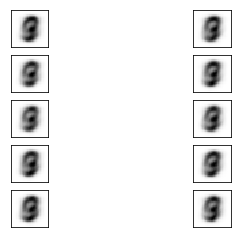

In [8]:
if __name__ == "__main__":


    tempCenter = []
    energyGrape = []
    accuracyGrape = []
    tryGrape = []

    realLabel , imageList, NUM_IMAGE = fileRead('mnist_test.csv')
    totalDistance = np.empty( NUM_IMAGE, dtype=float )
    totalDistance = np.empty( NUM_IMAGE, dtype=int )
    assumLabel = labelInit(NUM_IMAGE)
    accuracyGrape.append(computeAccuracy(realLabel,assumLabel,10))
    center = computeCenter(assumLabel,imageList,NUM_IMAGE)

    count = 0
    plotCenterImage(center)
    plt.show()

  
    

# Initial plotting

In [9]:
  while (not np.array_equal(tempCenter ,center)):

        tempCenter = center
        tryGrape.append(count)
        assumLabel,totalDistance = labelChange(imageList,center,NUM_IMAGE)
        count = count +1
        accuracyGrape.append( computeAccuracy( realLabel, assumLabel, 10) )


        energyGrape.append(sum(totalDistance)/10000)

        center = computeCenter(assumLabel,imageList,NUM_IMAGE)

# Final Plotting

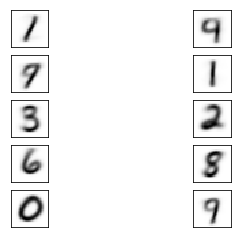

In [10]:
plotCenterImage(center)
plt.show()

# Result of Energy Graph

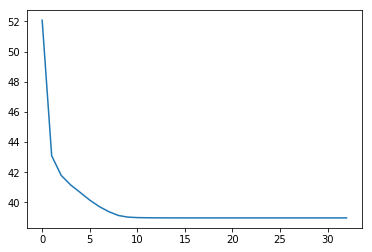

In [11]:
    plt.plot(tryGrape,energyGrape)
    plt.show()

# Result of Accuaracy Graph

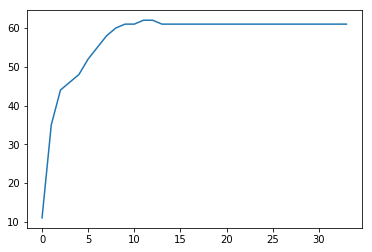

In [12]:
    tryGrape.append(++count)
    plt.plot(tryGrape,accuracyGrape)
    plt.show()

# Git Address

 \href { https://github.com/LeeKangJin/assignment }